In [50]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import ne_chunk, pos_tag

!pip install wordcloud
from wordcloud import WordCloud

In [51]:
data = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/11/Elon_musk.csv',encoding='latin-1')

In [52]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text Preprocessing

In [69]:
def preprocess_text(text):
# Remove leading and trailing characters
   text = text.strip()
    
# Remove empty strings
   if not text:
        return ' '
# Remove Twitter username handles
   text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    
# Remove punctuations
   text = text.translate(str.maketrans('', '', string.punctuation))
     
# Remove URLs or links
   text = re.sub(r'http\S+|www\S+', '', text)
    
# Convert to lowercase
   text = text.lower()
     
   return text
    


In [70]:
data['Cleaned_Text'] = data['Text'].apply(preprocess_text)

In [71]:
# Tokenization and Joining the list into one string/text
import nltk
nltk.download('punkt')

data['Tokens'] = data['Cleaned_Text'].apply(word_tokenize)
data['Joined_Text'] = data['Tokens'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [74]:
# Remove Stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_set = set(stopwords.words('english'))
data['Tokens'] = data['Tokens'].apply(lambda x: [word for word in x if word not in stopwords_set])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
# Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
data['Tokens'] = data['Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/deeptilalwani/nltk_data...


In [77]:
# Stemming 
stemmer = PorterStemmer()
data['Tokens'] = data['Tokens'].apply(lambda x: [stemmer.stem(word) for word in x])


# Feature Extraction

#### Feature Extraction using BoW (CountVectorizer)

In [78]:
count_vectorizer = CountVectorizer()
bow_features = count_vectorizer.fit_transform(data['Joined_Text'])


#### Feature Extraction using CountVectorizer with N-grams (Bigrams & Trigrams)

In [79]:
ngram_vectorizer = CountVectorizer(ngram_range=(2, 3))
ngram_features = ngram_vectorizer.fit_transform(data['Joined_Text'])

#### Feature Extraction using TF-IDF Vectorizer 

In [80]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['Joined_Text'])


# Generate Word Cloud

In [82]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

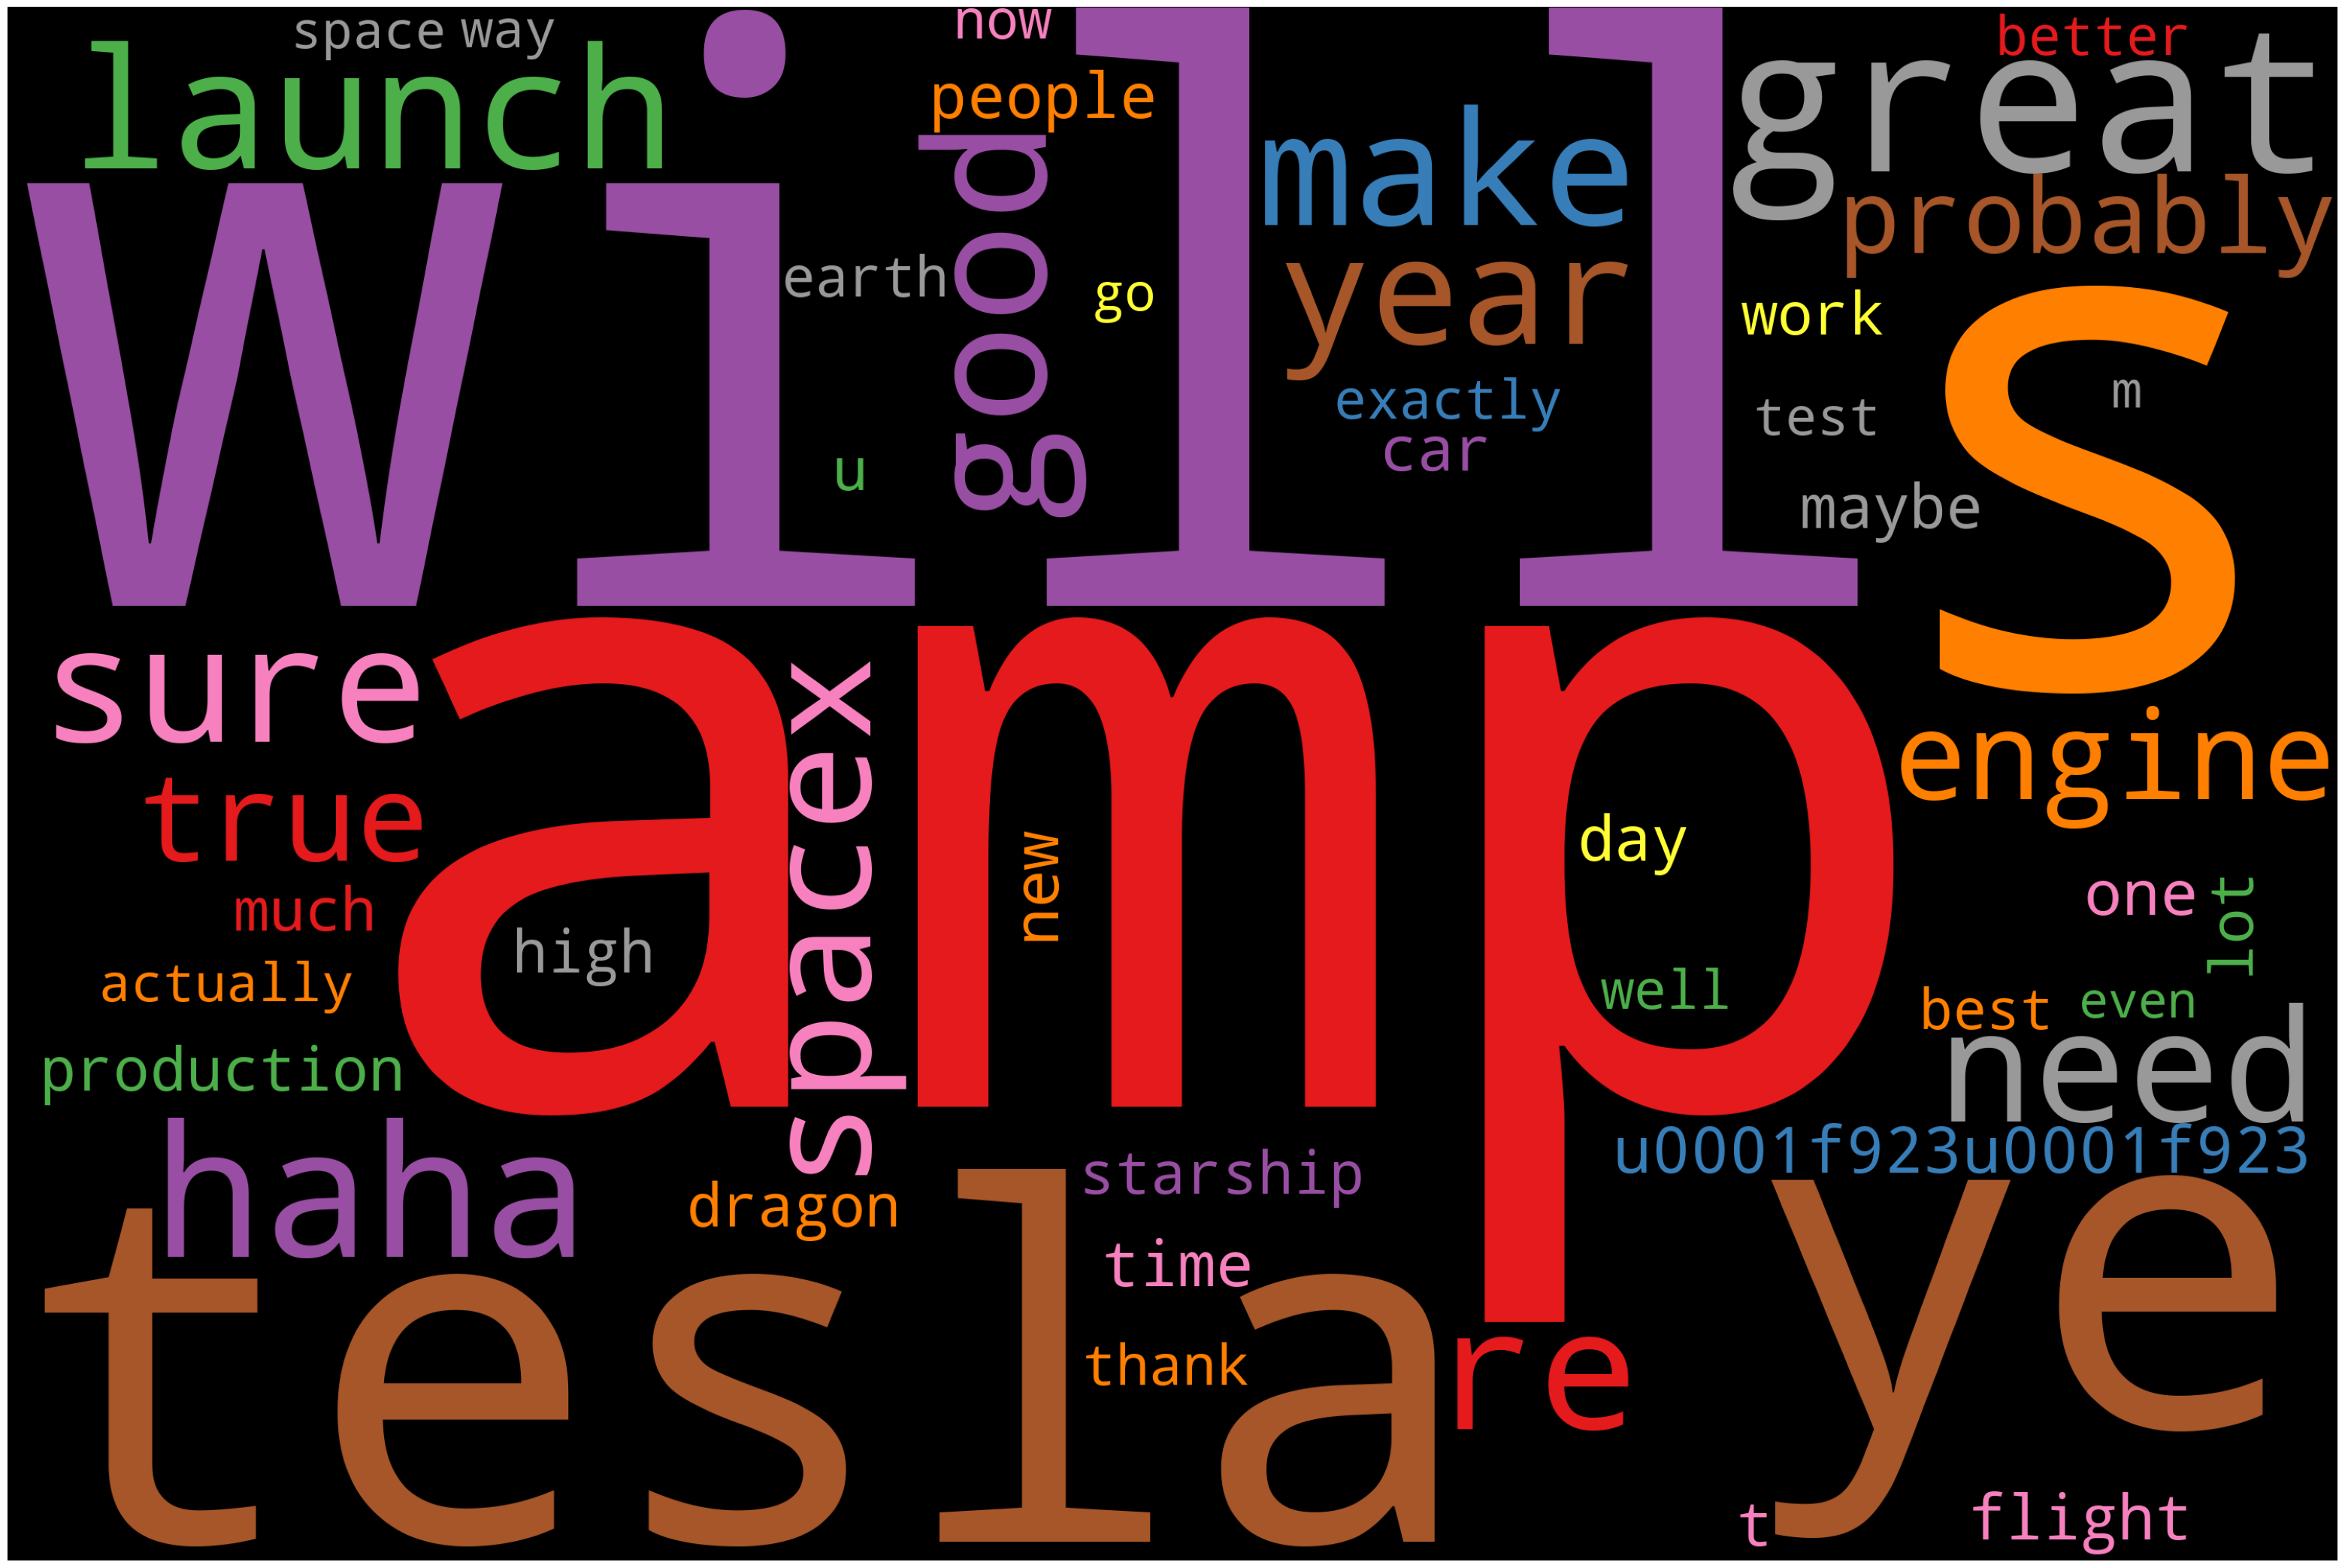

In [84]:
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')

clean_tweets = ' '.join(data['Cleaned_Text'])

wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=50,
                      colormap='Set1', stopwords=STOPWORDS).generate(clean_tweets)

plot_cloud(wordcloud)


# Named Entity Recognition (NER)

In [112]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
from nltk import ne_chunk, pos_tag
from collections import Counter


def filter_nouns_verbs(text):
    # Perform Named Entity Recognition (NER)
    entities = []
    for chunk in ne_chunk(pos_tag(nltk.word_tokenize(text))):
        if hasattr(chunk, 'label'):
            entities.append(' '.join(c[0] for c in chunk))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [115]:
# Filter out nouns and verbs
def filter_nouns_verbs(text):
    nouns_verbs = []
    for word, tag in pos_tag(nltk.word_tokenize(text)):
        if tag.startswith('NN') or tag.startswith('VB'):
            nouns_verbs.append(word.lower())
    
    return nouns_verbs

In [116]:
# Apply filtering to the 'Cleaned_Text' column
data['Nouns_Verbs'] = data['Cleaned_Text'].apply(lambda x: filter_nouns_verbs(x))


In [126]:
# Count the occurrences of nouns and verbs
noun_counts = Counter()
verb_counts = Counter()
for nv_list in data['Nouns_Verbs']:
    noun_counts.update([nv for nv in nv_list if nltk.pos_tag([nv])[0][1].startswith('NN')])
    verb_counts.update([nv for nv in nv_list if nltk.pos_tag([nv])[0][1].startswith('VB')])




In [127]:
# Get the top 10 most common nouns and verbs
top_10_nouns = noun_counts.most_common(10)
top_10_verbs = verb_counts.most_common(10)


In [128]:
# Print the word and count for top 10 nouns
print("Top 10 Nouns:")
for word, count in top_10_nouns:
    print(f"{word:<15} {count}")

Top 10 Nouns:
amp             142
rt              115
i               82
tesla           81
yes             71
haha            52
its            45
launch          42
yeah            34
u0001f923u0001f923 31


In [129]:
# Print the word and count for top 10 verbs
print("\nTop 10 Verbs:")
for word, count in top_10_verbs:
    print(f"{word:<15} {count}")


Top 10 Verbs:
is              355
be              157
are             100
have            74
was             74
has             58
do              38
make            33
coming          24
get             23


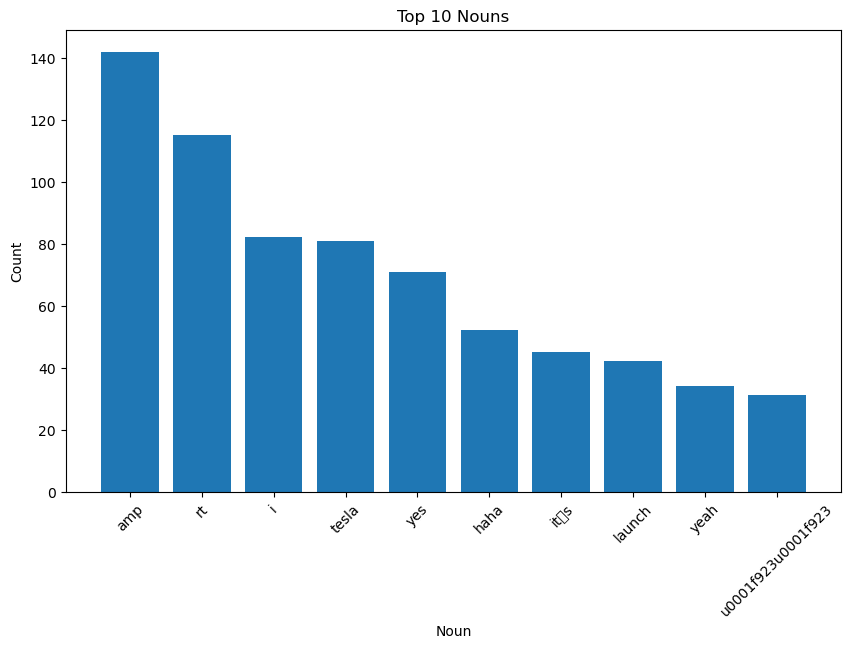

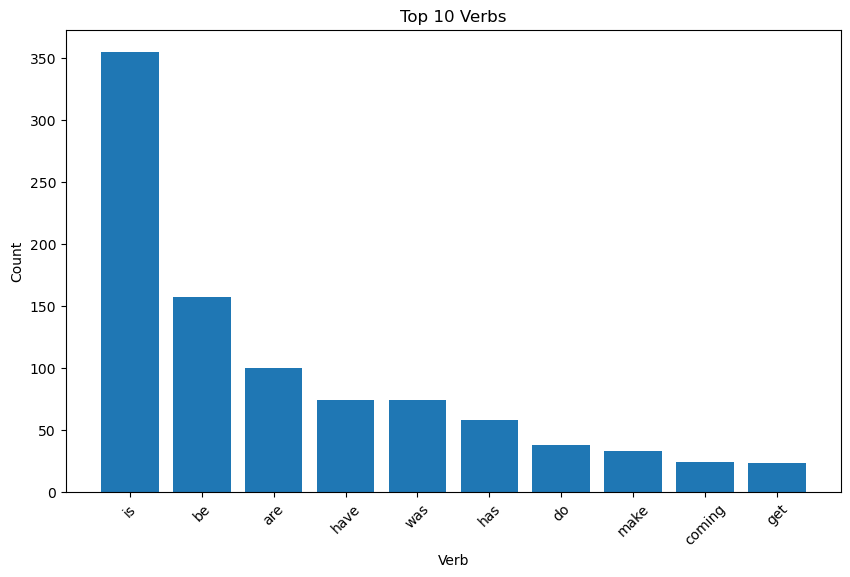

In [132]:
# Visualize the results (Barchart for top 10 nouns + verbs)
fig, ax = plt.subplots(figsize=(10, 6))
x = [word for word, count in top_10_nouns]
y = [count for word, count in top_10_nouns]
ax.bar(x, y)
ax.set_title('Top 10 Nouns')
ax.set_xlabel('Noun')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
x = [word for word, count in top_10_verbs]
y = [count for word, count in top_10_verbs]
ax.bar(x, y)
ax.set_title('Top 10 Verbs')
ax.set_xlabel('Verb')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Emotion Mining - Sentiment Analysis 

In [134]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download Vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/deeptilalwani/nltk_data...


True

In [135]:
# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()


In [136]:
# Custom function to calculate sentiment score for a sentence
def calculate_sentiment_score(sentence):
    sentiment_score = sia.polarity_scores(sentence)['compound']
    return sentiment_score

In [137]:
# Calculate sentiment score for each sentence in the 'Cleaned_Text' column
data['Sentiment_Score'] = data['Cleaned_Text'].apply(calculate_sentiment_score)


In [138]:
# Calculate the number of words in each sentence
data['Word_Count'] = data['Cleaned_Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [143]:
# Calculate sentiment scores for the whole review
total_sentiment_score = data['Sentiment_Score'].sum()
total_negative_sentiment_score = data[data['Sentiment_Score'] < 0]['Sentiment_Score'].sum()
total_positive_sentiment_score = data[data['Sentiment_Score'] > 0]['Sentiment_Score'].sum()

whole_review_sentiment_score = data['Sentiment_Score'].sum()

In [144]:
# Print sentiment score statistics
print("Sentiment Score Statistics:")
print(data['Sentiment_Score'].describe())
print("Sentiment Score of the Whole Review:", whole_review_sentiment_score)

Sentiment Score Statistics:
count    1999.000000
mean        0.166976
std         0.317227
min        -0.844200
25%         0.000000
50%         0.000000
75%         0.421500
max         0.932500
Name: Sentiment_Score, dtype: float64
Sentiment Score of the Whole Review: 333.78550000000007


In [145]:
# Print sentiment scores
print("Sentiment Analysis Results:")
print("Total Sentiment Score:", total_sentiment_score)
print("Total Negative Sentiment Score:", total_negative_sentiment_score)
print("Total Positive Sentiment Score:", total_positive_sentiment_score)

Sentiment Analysis Results:
Total Sentiment Score: 333.78550000000007
Total Negative Sentiment Score: -78.6925
Total Positive Sentiment Score: 412.478


In [147]:
# Add an index column
data['Index'] = range(1, len(data) + 1)


In [149]:
print(data[['Index', 'Text', 'Cleaned_Text', 'Tokens', 'Sentiment_Score']])

      Index                                               Text  \
0         1                             @kunalb11 Im an alien   
1         2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2         3                @joerogan @Spotify Great interview!   
3         4                    @gtera27 Doge is underestimated   
4         5  @teslacn Congratulations Tesla China for amazi...   
...     ...                                                ...   
1994   1995  @flcnhvy True, it sounds so surreal, but the n...   
1995   1996  @PPathole Make sure to read ur terms &amp; con...   
1996   1997                @TeslaGong @PPathole Samwise Gamgee   
1997   1998  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998   1999                          Progress update August 28   

                                           Cleaned_Text  \
0                                          im an alien   
1      ray tracing on cyberpunk with hdr is nextleve...   
2                             

/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_95919/3440300955.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sentiment_Score'], bins=20, kde=True)


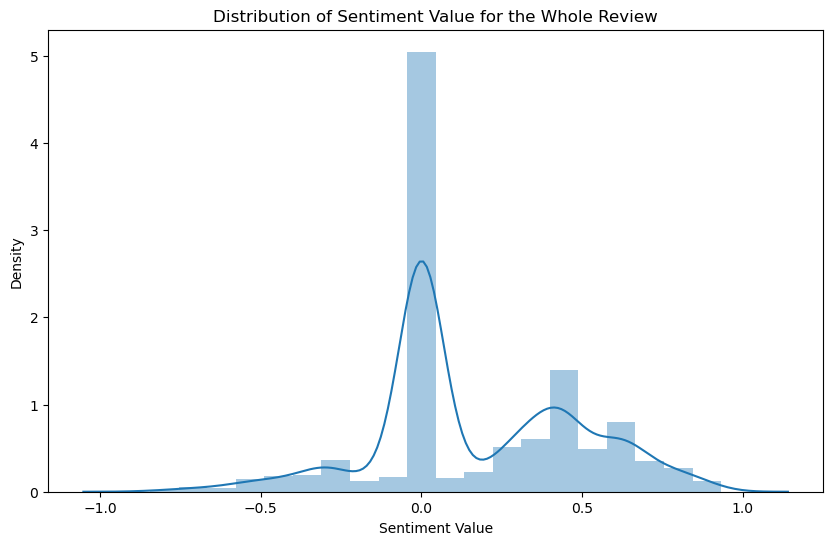

In [154]:
# Plot sentiment value for the whole review
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(data['Sentiment_Score'], bins=20, kde=True)

# Add plot title and labels
plt.title('Distribution of Sentiment Value for the Whole Review')
plt.xlabel('Sentiment Value')
plt.ylabel('Density')

# Show the plot
plt.show()

#### This plot allows to observe how the sentiment changes over time or sentence progression.

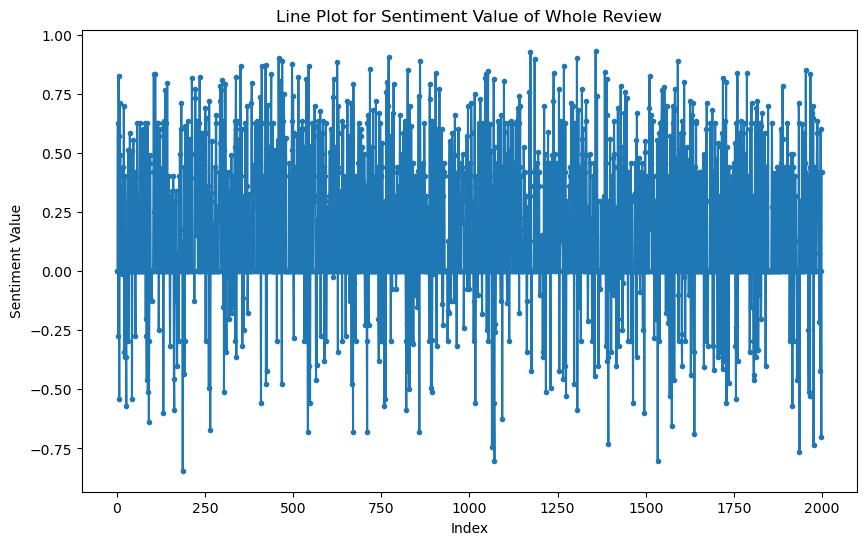

In [151]:
# Plot line plot for sentiment value of the whole review
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['Index'], data['Sentiment_Score'], marker='o', linestyle='-', markersize=3)
ax.set_title('Line Plot for Sentiment Value of Whole Review')
ax.set_xlabel('Index')
ax.set_ylabel('Sentiment Value')
plt.show()

#### This plot helps in visualizing the sentiment trajectory of the entire review, providing a smoother representation compared to individual data points

In [152]:
# Correlation analysis
correlation = data['Sentiment_Score'].corr(data['Word_Count'])
print("Correlation between Sentiment Score and Word Count:", correlation)

Correlation between Sentiment Score and Word Count: 0.03171100191392059


#### The weak correlation suggests that the sentiment expressed in the text is not strongly dependent on the length of the review or the number of words used.